<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Great Learning / Deakin (MDS) Project Submission**
<hr>

>**Natural Language Processing (NLP) Project 1**<br>
>*Goal : Demonstrate the ability to build a text classifier*<br>
>*Domain : Digital content and entertainment industry* <br>
>*Developer : Nishant Killedar*
<br>

> **CONTEXT:** The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.
<br>

> **PROJECT OBJECTIVE**: To Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

<hr>

### **Section 0 : Functions for preprocessing data, building and training the model**

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
def load_imdb_data(num_words=None):
  (xtrain, ytrain), (xtest, ytest) = imdb.load_data(num_words=num_words)
  return (xtrain, ytrain, xtest, ytest)

In [ ]:
def pad_sequences(xtrain, xtest, maxl):
  xtrain = sequence.pad_sequences(xtrain, maxlen=maxl)
  xtest = sequence.pad_sequences(xtest, maxlen=maxl)
  return (xtrain, xtest)

In [ ]:
def vector_to_sentence(vector):
  INDEX_FROM = 3
  word_index = keras.datasets.imdb.get_word_index()
  word_index = {k:(v+INDEX_FROM) for k,v in word_index.items()}
  word_index["<PAD>"] = 0
  word_index["<START>"] = 1
  word_index["<UNK>"] = 2
  word_index["<UNUSED>"] = 3

  word = {value:key for key,value in word_index.items() }
  return(' '.join(word[id] for id in vector if word[id] not in ['<PAD>', '<START>', '<UNK>', '<UNUSED>'] ))

In [ ]:
def print_feature_labels(xdata, ydata):
  print("----- Vector, Label, Sentence ----------")
  print('Feature     :', xdata)
  print('Label       :', ydata)
  print('Sentence    :', vector_to_sentence(xdata))
  print("----------------------------------------")

In [ ]:
def print_shape(xtrain, ytrain, xtest, ytest):
  print("----- Shape of the Data --------")
  print("X Train      ", xtrain.shape)
  print("Y Train      ", ytrain.shape)
  print("X Test       ", xtest.shape)
  print("Y Test       ", ytest.shape)
  print("--------------------------------")

In [ ]:
def build_NN_model(algorithm):
  model = Sequential()
  model.add(Embedding(10000, 128, input_length=250))
  if algorithm == 'lstm' :
    model.add(LSTM(128, activation='tanh', return_sequences=False))
  if algorithm == 'rnn' :
    model.add(SimpleRNN(128, activation='tanh', return_sequences=False))
  if algorithm == 'blstm' :
    model.add(GRU(128, activation='tanh', return_sequences=False))
  if algorithm == 'gru' :
    model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=False)))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(1, activation='sigmoid'))
  return model

In [ ]:
def compile_NN_model(model):
  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  return model

In [ ]:
def train_NN_model(algorithm, xtrain, ytrain, xtest, ytest):
  model = build_NN_model(algorithm)
  model = compile_NN_model(model)
  early_stopping = EarlyStopping(monitor='val_loss', patience=4)
  history = model.fit(xtrain, ytrain,
          batch_size=32,
          epochs=5,
          validation_data=(xtest, ytest),
          callbacks=[early_stopping])
  return model, history

In [ ]:
def predict_NN_model(model, xtest, ytest):
  ypred = (model.predict(xtest)>0.5).astype(int)
  return ypred

### **Section 1 : Import and analyse the data set. [5 Marks]**
<font color='gray'>Hint: Use `imdb.load_ method; Get train and test set; Take 10000 most frequent words</font>

In [ ]:
maxl = 250
maxf = 10000

In [ ]:
xtrain, ytrain, xtest, ytest = load_imdb_data(maxf)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(xtrain.shape)
print(ytrain.shape)

(25000,)
(25000,)


In [ ]:
print(xtrain[0])
print(ytrain[0])
print(vector_to_sentence(xtrain[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
1641221/1641221 [==============================] - 0s 0us/

In [ ]:
unique, counts = np.unique(ytrain, return_counts=True)
dict(zip(unique, counts))

{0: 12500, 1: 12500}

### **Section 2 : Perform relevant sequence adding on the data. [5 Marks]**

In [ ]:
xtrain, xtest = pad_sequences(xtrain, xtest, maxl)

### **Section 3 : Perform following data analysis: [5 Marks]**
<li> Print shape of features and labels
<li> Print value of any one feature and it's label

In [ ]:
print_shape(xtrain, ytrain, xtest, ytest)

----- Shape of the Data --------
X Train       (25000, 250)
Y Train       (25000,)
X Test        (25000, 250)
Y Test        (25000,)
--------------------------------


In [ ]:
print_feature_labels(xtrain[0], ytrain[0])

----- Vector, Label, Sentence ----------
Feature     : [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    1   14   22   16   43  530  973 1622 1385   65
  458 4468   66 3941    4  173   36  256    5   25  100   43  838  112
   50  670    2    9   35  480  284    5  150    4  172  112  167    2
  336  385   39    4  172 4536 1111   17  546   38   13  447    4  192
   50   16    6  147 2025   19   14   22    4 1920 4613  469    4   22
   71   87   12   16   43  530   38   76   15   13 1247    4   22   17
  515   17   12   16  626   18    2    5   62  386   12    8  316    8
  106    5    4 2223 5244   16  480   66 3785   33    4  130   12   16
   38  619    5   25  124   51   36  135   48   25 1415   33    6   22
   12  215   28   77   52    5   14  407   16   82    2    8    4  107
  117 5952   15  256    4    2    7 3766    5  723   36   71   43  530
  476   26  400  317  

### **Section 4 : Decode the feature value to get original sentence [5 Marks]**

In [ ]:
print_feature_labels(xtrain[500], ytrain[500])

----- Vector, Label, Sentence ----------
Feature     : [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  

### **Section 5 : Design, train, tune and test a sequential model. [5 Marks]**
<font color='gray'>Hint : The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be analytical and experimental here in trying new approaches to design the best model.</font>

**Train a LSTM model using the data**

In [ ]:
lstm, lstm_hist = train_NN_model('lstm', xtrain, ytrain, xtest, ytest)

Epoch 1/5
782/782 [==============================] - 47s 54ms/step - loss: 0.4313 - accuracy: 0.7980 - val_loss: 0.3284 - val_accuracy: 0.8572
Epoch 2/5
782/782 [==============================] - 18s 22ms/step - loss: 0.2496 - accuracy: 0.9014 - val_loss: 0.3428 - val_accuracy: 0.8556
Epoch 3/5
782/782 [==============================] - 14s 18ms/step - loss: 0.1871 - accuracy: 0.9276 - val_loss: 0.4956 - val_accuracy: 0.8132
Epoch 4/5
782/782 [==============================] - 15s 19ms/step - loss: 0.1372 - accuracy: 0.9482 - val_loss: 0.4311 - val_accuracy: 0.8567
Epoch 5/5
782/782 [==============================] - 13s 17ms/step - loss: 0.1162 - accuracy: 0.9568 - val_loss: 0.5103 - val_accuracy: 0.8483


In [ ]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1412225 (5.39 MB)
Trainable params: 1411969 (5.39 MB)
Non-trainable params: 256 (1.00 KB)
__________________

In [ ]:
ypred_lstm = predict_NN_model(lstm, xtest, ytest)

782/782 [==============================] - 4s 4ms/step


**Train a RNN model using the data**

In [ ]:
rnn, rnn_hist = train_NN_model('rnn', xtrain, ytrain, xtest, ytest)

Epoch 1/5
782/782 [==============================] - 153s 194ms/step - loss: 0.7346 - accuracy: 0.5233 - val_loss: 0.6823 - val_accuracy: 0.5506
Epoch 2/5
782/782 [==============================] - 131s 167ms/step - loss: 0.6224 - accuracy: 0.6447 - val_loss: 0.6321 - val_accuracy: 0.6308
Epoch 3/5
782/782 [==============================] - 125s 160ms/step - loss: 0.5263 - accuracy: 0.7430 - val_loss: 0.4948 - val_accuracy: 0.7836
Epoch 4/5
782/782 [==============================] - 125s 160ms/step - loss: 0.4759 - accuracy: 0.7850 - val_loss: 0.4977 - val_accuracy: 0.7794
Epoch 5/5
782/782 [==============================] - 125s 160ms/step - loss: 0.4320 - accuracy: 0.8160 - val_loss: 0.6799 - val_accuracy: 0.6363


In [ ]:
ypred_rnn = predict_NN_model(rnn, xtest, ytest)

782/782 [==============================] - 14s 18ms/step


**Train a Bidirectional LSTM model using the data**

In [ ]:
blstm, blstm_hist = train_NN_model('blstm', xtrain, ytrain, xtest, ytest)

Epoch 1/5
782/782 [==============================] - 43s 52ms/step - loss: 0.4466 - accuracy: 0.7811 - val_loss: 0.7468 - val_accuracy: 0.6560
Epoch 2/5
782/782 [==============================] - 18s 23ms/step - loss: 0.2299 - accuracy: 0.9084 - val_loss: 0.3465 - val_accuracy: 0.8577
Epoch 3/5
782/782 [==============================] - 16s 21ms/step - loss: 0.1452 - accuracy: 0.9461 - val_loss: 0.3924 - val_accuracy: 0.8732
Epoch 4/5
782/782 [==============================] - 13s 17ms/step - loss: 0.0953 - accuracy: 0.9660 - val_loss: 0.3965 - val_accuracy: 0.8696
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.0603 - accuracy: 0.9784 - val_loss: 0.5863 - val_accuracy: 0.8584


In [ ]:
ypred_blstm = predict_NN_model(blstm, xtest, ytest)

782/782 [==============================] - 3s 4ms/step


**Train a GRU model using the data**

In [ ]:
gru, gru_hist = train_NN_model('gru', xtrain, ytrain, xtest, ytest)

Epoch 1/5
782/782 [==============================] - 54s 65ms/step - loss: 0.4119 - accuracy: 0.8084 - val_loss: 0.3795 - val_accuracy: 0.8610
Epoch 2/5
782/782 [==============================] - 24s 31ms/step - loss: 0.2476 - accuracy: 0.9037 - val_loss: 0.3635 - val_accuracy: 0.8622
Epoch 3/5
782/782 [==============================] - 24s 30ms/step - loss: 0.1626 - accuracy: 0.9383 - val_loss: 0.3841 - val_accuracy: 0.8601
Epoch 4/5
782/782 [==============================] - 22s 28ms/step - loss: 0.1184 - accuracy: 0.9565 - val_loss: 0.5278 - val_accuracy: 0.8286
Epoch 5/5
782/782 [==============================] - 21s 27ms/step - loss: 0.1041 - accuracy: 0.9621 - val_loss: 0.5868 - val_accuracy: 0.8548


In [ ]:
ypred_gru = predict_NN_model(gru, xtest, ytest)

782/782 [==============================] - 6s 7ms/step


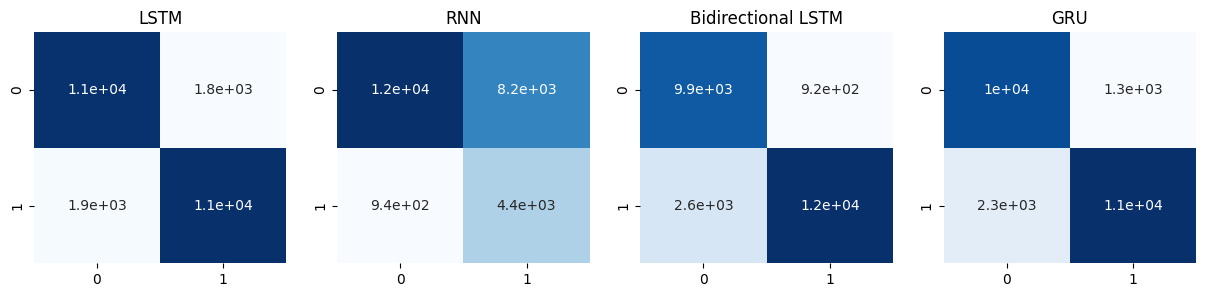

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15, 3))
sns.heatmap(confusion_matrix(ypred_lstm, ytest), ax = ax1, cmap='Blues', annot=True, cbar=False)
sns.heatmap(confusion_matrix(ypred_rnn, ytest), ax = ax2, cmap='Blues', annot=True, cbar=False)
sns.heatmap(confusion_matrix(ypred_blstm, ytest), ax = ax3, cmap='Blues', annot=True, cbar=False)
sns.heatmap(confusion_matrix(ypred_gru, ytest), ax = ax4, cmap='Blues', annot=True, cbar=False)
ax1.set_title('LSTM')
ax2.set_title('RNN')
ax3.set_title('Bidirectional LSTM')
ax4.set_title('GRU')
plt.show()

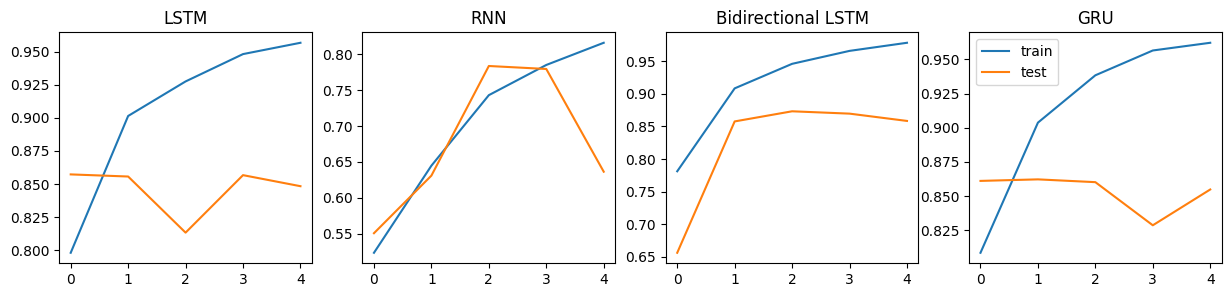

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15, 3))
ax1.plot(lstm_hist.history['accuracy'])
ax1.plot(lstm_hist.history['val_accuracy'])
ax2.plot(rnn_hist.history['accuracy'])
ax2.plot(rnn_hist.history['val_accuracy'])
ax3.plot(blstm_hist.history['accuracy'])
ax3.plot(blstm_hist.history['val_accuracy'])
ax4.plot(gru_hist.history['accuracy'])
ax4.plot(gru_hist.history['val_accuracy'])
ax1.set_title('LSTM')
ax2.set_title('RNN')
ax3.set_title('Bidirectional LSTM')
ax4.set_title('GRU')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print('LSTM Accuracy  :', accuracy_score(ypred_lstm, ytest))
print('RNN Accuracy   :', accuracy_score(ypred_rnn, ytest))
print('BLSTM Accuracy :', accuracy_score(ypred_blstm, ytest))
print('GRU Accuracy   :', accuracy_score(ypred_gru, ytest))

LSTM Accuracy  : 0.84832
RNN Accuracy   : 0.63628
BLSTM Accuracy : 0.85844
GRU Accuracy   : 0.85476


### **Section 6 : Use the designed model to print the prediction on any one sample. [5 Marks]**

In [ ]:
print('Sample 1    :', vector_to_sentence(xtest[200]))
print('Class Label :', ytest[200])
print('Prediction  :', ypred_blstm[200][0])

Sample 1    : don't be fooled this isn't yet another tired example of the girls from outer space pretending to be the french team come to earth to collect as much as possible genre though the synopsis may suggest otherwise this movie is a gem an absolute jewel that has my life from the moment i laid eyes upon it hilarious action packed and stunningly erotic is a euro tour de force a grossly underrated classic br br stop everything you are doing and run out to rent or better yet buy this movie immediately
Class Label : 1
Prediction  : 1


In [ ]:
print('Sample 2    :', vector_to_sentence(xtest[51]))
print('Class Label :', ytest[51])
print('Prediction  :', ypred_blstm[51][0])

Sample 2    : i just read an extra long review on the front page of this movie on this site and he explained in full detail that this movie is only worth watching on the television show mystery science theater 3000 and yes i do find that advice really helpful i mean a movie that tries to be this good and this exciting just really is not what that movie wants to be so yes do watch this movie as seen on that show and instead of giving this movie a single star out of ten stars you can give this a ten out of ten stars until then my one star review is for the real pure version of this movie only got that now
Class Label : 0
Prediction  : 0


In [ ]:
print('Sample 3    :', vector_to_sentence(xtest[369]))
print('Class Label :', ytest[369])
print('Prediction  :', ypred_blstm[369][0])

Sample 3    : and the credits begin as the last ten minutes are beginning there are some goofs and behind the scenes stuff going on while those credits roll br br movies do tend to be short and tend to feel padded out in spite of that this is no exception with some scenes that tend to go on too long br br the story involves a poor kid in california who'd been picked on by all his classmates he'd had one shoe stolen and unable to replace it he was dubbed due to an obsession with pirates his parents gave him an for christmas with a christmas tree on the br br many of the classmates are killed and the few who remain gather together to decide what to do they're picked off one by one by who stalks around to the sound of br br the characters are pretty much all broad stereotypes like the nerd named etc there's an odd scene in which a kinky couple has sex the woman is and the man wears a large paper slice over his head this reminded me of some of the stranger sex scenes from director dream br

<hr>

>**Natural Language Processing (NLP) Project 2**<br>
>*Goal : Demonstrate the ability to build a text classifier*<br>
>*Domain : Social media analytics* <br>
>*Developer : Nishant Killedar*
<br>

> **CONTEXT:** Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.
<br>

> **PROJECT OBJECTIVE**: To Build a sequential NLP classifier which can use input text parameters to determine if a sentence is sarcastic or not.

<hr>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from tqdm import tqdm
from keras.models import Sequential
%tensorflow_version 2.x
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional
from tensorflow.keras.optimizers import Adam

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### **Section 1 : Read and explore the data [3 Marks]**

In [ ]:
df = pd.read_json('/content/drive/MyDrive/datasets/nlp/sarcasm/Sarcasm_Headlines_Dataset.json', lines = True)

In [ ]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
df.shape

(28619, 3)

We have a total of 28619 headlines from articles which is a good size dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


> **Observations**:

> Data has 28619 rows and 3 columns.<br>
> Sarcastic label is INT, Headline/Articlee link columns are object type.<br>
> There are no null values present in the dataset.<br>

In [ ]:
df['is_sarcastic'].value_counts(normalize=True)

0    0.523603
1    0.476397
Name: is_sarcastic, dtype: float64

<Axes: xlabel='is_sarcastic', ylabel='count'>

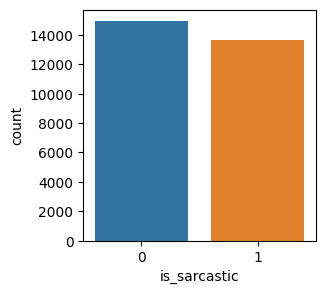

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x=df['is_sarcastic'], data=df)

> **The dataset has a good distribution of sarcastic and non sarcastic statements which should allow the model to learn well**



In [ ]:
# Get the length & number of words in each headline
df['length'] = df['headline'].apply(lambda x: len(x))
df['wordcount'] = df['headline'].apply(lambda x: len(x.split()))

### **Section 2 : Retain relevant columns [3 Marks]**

In [ ]:
# Drop the article link column as it is not needed for the model
df.drop(['article_link'], axis=1, inplace=True)

In [ ]:
df.head()

,is_sarcastic,headline,length,wordcount
0,1,thirtysomething scientists unveil doomsday clo...,61,8
1,0,dem rep. totally nails why congress is falling...,79,13
2,0,eat your veggies: 9 deliciously different recipes,49,7
3,1,inclement weather prevents liar from getting t...,52,8
4,1,mother comes pretty close to using word 'strea...,61,9


### **Section 3 : Get length of each sentence [3 Marks]**

In [ ]:
!pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=023b37cd6554a19dfdf7da95d09d7f62d9f79c95d924b750553e28ceb251d21b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
# For headlines numbers have meaning, so converting number to words ( for e.g., 9 to nine )
from num2words import num2words
df['headline'] = df['headline'].apply(lambda x: ' '.join([num2words(word) if word.isdigit() else word for word in x.split()]))

In [ ]:
df.head()

,is_sarcastic,headline,length,wordcount
0,1,thirtysomething scientists unveil doomsday clo...,61,8
1,0,dem rep. totally nails why congress is falling...,79,13
2,0,eat your veggies: nine deliciously different r...,49,7
3,1,inclement weather prevents liar from getting t...,52,8
4,1,mother comes pretty close to using word 'strea...,61,9


In [ ]:
# checking for duplicate values
df.duplicated().sum()

116

> **There are 116 duplicate records which can be dropped from the dataset**

In [ ]:
df.drop_duplicates(inplace = True)

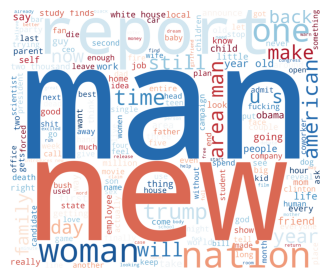

In [ ]:
# Create & show wordcloud of sarcastic sentences
sarc_headlines = df[df['is_sarcastic'] == 1]
words = ' '.join(sarc_headlines['headline'])
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)
plt.figure(1, figsize = (4, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**"new", "report", "man", "nation", "woman", "time" were some of the top words in sarcastic headlines**

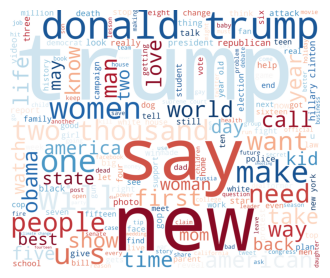

In [ ]:
# Create & show wordcloud of non sarcastic sentences
non_sarc_headlines = df[df['is_sarcastic'] == 0]
words_nsc = ' '.join(non_sarc_headlines['headline'])
cleaned_word_nsc = " ".join([word for word in words_nsc.split()])
wordcloud_nsc = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word_nsc)
plt.figure(1, figsize = (4, 10))
plt.imshow(wordcloud_nsc)
plt.axis('off')
plt.show()

**"new", "donald", "trump", "women", "world" were some of the top words in sarcastic headlines**

### **Section 4 : Define parameters [3 Marks]**

In [ ]:
import nltk
nltk.download('stopwords')
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
max_features = 10000
max_len = 300
embedding_size = 128

In [ ]:
print("Before applying the expression :", df['headline'][1])
pattern = '[^a-zA-Z0-9]'
res = re.sub(pattern, ' ', df['headline'][1])

print("After applying the expression :", res)

Before applying the expression : dem rep. totally nails why congress is falling short on gender, racial equality
After applying the expression : dem rep  totally nails why congress is falling short on gender  racial equality


In [ ]:
print("Before applying the expression :", res)
pattern = '\s+'
resf = re.sub(pattern, ' ', res)

print("After applying the expression :", resf)

Before applying the expression : dem rep  totally nails why congress is falling short on gender  racial equality
After applying the expression : dem rep totally nails why congress is falling short on gender racial equality


In [ ]:
print("Before applying the expression :", resf)
pattern = '\d+'
resl = re.sub(pattern, ' ', resf)

print("After applying the expression :", resl)

Before applying the expression : dem rep totally nails why congress is falling short on gender racial equality
After applying the expression : dem rep totally nails why congress is falling short on gender racial equality


In [ ]:
final_corpus = []

for i in range(df.shape[0]):

    text = re.sub('[^a-zA-Z0-9]', ' ', df['headline'].iloc[i])
    text = text.lower()
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'\d',' ',text)
    text = text.split()
    text = [word for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    final_corpus.append(text)

df['final_text'] = final_corpus

In [ ]:
all_words = " ".join(words for words in df.final_text)
print ("There are {} words in total.".format(len(all_words)))

There are 1468907 words in total.


### **Section 5, 6, 7, 8**
> Section 5 : Get indices for words [3 Marks] <br>
Section 6 : Create features and labels [3 Marks] <br>
Section 7 : Get vocabulary size [3 Marks] <br>
Section 8 : Create a weight matrix using GloVe embeddings [3 Marks] <br>

In [ ]:
# load the GloVe vectors in a dictionary:
embeddings_index = {}
f = open(r'/content/drive/MyDrive/datasets/nlp/glove.6B/glove.6B.300d.txt', encoding="utf8")

for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.array(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:24, 16073.13it/s]

Found 400000 word vectors.


In [ ]:
maxLen = 300
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['final_text'])
words_to_index = tokenizer.word_index
vocab_len = len(words_to_index)
embed_vector_len = embeddings_index['first'].shape[0]
emb_matrix = np.zeros((vocab_len, embed_vector_len))
for word, index in words_to_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    emb_matrix[(index-1), :] = embedding_vector
embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights=[emb_matrix], trainable=False)

In [ ]:
emb_matrix.shape

(25775, 300)

In [ ]:
print(vocab_len)
print(embed_vector_len)
print(maxLen)
print(emb_matrix.shape)

25775
300
300
(25775, 300)


### **Section 9 : Define and compile a LSTM model. [3 Marks]**

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, recurrent_dropout = 0, unroll = False, use_bias = True)))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
# compile the model
adam = Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [ ]:
# creating the target feature
y = pd.get_dummies(df['is_sarcastic'])

In [ ]:
y

,0,1
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
28614,0,1
28615,0,1
28616,1,0
28617,0,1


In [ ]:
df.final_text.values

array(['thirtysomething scientists unveil doomsday clock hair loss',
       'dem rep totally nails congress falling short gender racial equality',
       'eat veggies nine deliciously different recipes', ...,
       'beautiful acceptance speech week came queer korean',
       'mars probe destroyed orbiting spielberg gates space palace',
       'dad clarifies food stop'], dtype=object)

In [ ]:
xtrain, xvalid, ytrain, yvalid = train_test_split(df.final_text.values, y,
                                                  stratify = df.is_sarcastic.values,
                                                  random_state = 42,
                                                  test_size = 0.2, shuffle = True)

In [ ]:
xtrain

array(['gobbler games brutal hunger games parody need see',
       'politicians think microphone start getting real',
       'mike pence training vice presidential debate hitting punching bag climate change study taped front',
       ..., 'divorce life reconciliation',
       'ai weiwei commemorates drowned refugees berlin film festival',
       'vin diesel reveals groot dance guardians galaxy sequel'],
      dtype=object)

In [ ]:
xtrain_indices = tokenizer.texts_to_sequences(xtrain)
xtrain_indices = pad_sequences(xtrain_indices, maxlen=maxLen, padding='post')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 300)          7732500   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 300)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               439296    
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 2)                 514       
                                                                 
Total params: 8172310 (31.17 MB)
Trainable params: 439810 (1.68 MB)
Non-trainable params: 7732500 (29.50 MB)
_________________________________________________________________


In [ ]:
xtrain_indices.shape

(22802, 300)

### **Section 10 : Fit the model and check the validation accuracy [3 Marks]**

In [ ]:
model.fit(xtrain_indices, ytrain, batch_size=64, epochs=15)

Epoch 1/15
357/357 [==============================] - 15s 32ms/step - loss: 0.6727 - accuracy: 0.5836
Epoch 2/15
357/357 [==============================] - 12s 33ms/step - loss: 0.6421 - accuracy: 0.6281
Epoch 3/15
357/357 [==============================] - 12s 33ms/step - loss: 0.6262 - accuracy: 0.6459
Epoch 4/15
357/357 [==============================] - 12s 33ms/step - loss: 0.6133 - accuracy: 0.6580
Epoch 5/15
357/357 [==============================] - 12s 33ms/step - loss: 0.6030 - accuracy: 0.6660
Epoch 6/15
357/357 [==============================] - 12s 33ms/step - loss: 0.5968 - accuracy: 0.6741
Epoch 7/15
357/357 [==============================] - 12s 32ms/step - loss: 0.5876 - accuracy: 0.6776
Epoch 8/15
357/357 [==============================] - 12s 32ms/step - loss: 0.5783 - accuracy: 0.6912
Epoch 9/15
357/357 [==============================] - 12s 33ms/step - loss: 0.5706 - accuracy: 0.6959
Epoch 10/15
357/357 [==============================] - 12s 33ms/step - loss: 0.562

In [ ]:
xtest_indices = tokenizer.texts_to_sequences(xvalid)
xtest_indices = pad_sequences(xtest_indices, maxlen=maxLen, padding='post')

In [ ]:
ypred = model.predict(xtest_indices)

179/179 [==============================] - 2s 8ms/step


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
ypreds = ypred[:,1].round().astype(int)

In [ ]:
yvalids = yvalid.iloc[:,1].values

In [ ]:
print(classification_report(yvalids, ypreds))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      2990
           1       0.72      0.67      0.69      2711

    accuracy                           0.72      5701
   macro avg       0.72      0.71      0.71      5701
weighted avg       0.72      0.72      0.71      5701



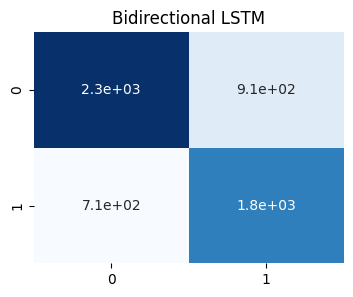

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(ypreds, yvalids), cmap='Blues', annot=True, cbar=False)
plt.title('Bidirectional LSTM')
plt.show()

In [ ]:
print(xvalid[320])
if ypreds[320] == 1:
  print('Predicted : Sarcastic')
else:
  print('Predicted : Not Sarcastic')
if yvalids[320] == 1:
  print('Actual : Sarcastic')
else:
  print('Actual : Not Sarcastic')

mccain speechwriter trying write lines lead creepy smile
Predicted : Sarcastic
Actual : Sarcastic


In [ ]:
xtest_index = tokenizer.texts_to_sequences('Looks like it is going to rain today')

In [ ]:
xtest_index

[[1564],
 [],
 [],
 [520],
 [],
 [],
 [1564],
 [],
 [520],
 [695],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [1381],
 [],
 [],
 [738],
 [1381],
 [],
 [],
 [],
 [],
 [1180],
 [],
 [],
 [738],
 [],
 [],
 [],
 [],
 [],
 []]

In [ ]:
xtest_index = pad_sequences(xtest_index, maxlen=maxLen, padding='post')
ypred2 = model.predict(xtest_index)
ypreds2 = ypred2[:,1].round().astype(int)
print(ypreds2)

2/2 [==============================] - 0s 9ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
%%shell
jupyter nbconvert --to html '/content/NLP_Project.ipynb'

[NbConvertApp] Converting notebook /content/NLP_Project.ipynb to html
[NbConvertApp] Writing 1221300 bytes to /content/NLP_Project.html
